In [19]:
import pandas as pd
import yfinance as yf
import datetime as dt
from prophet import Prophet
from prophet.plot import plot_plotly
import matplotlib.pyplot as plt

In [20]:
start = dt.datetime.now()-dt.timedelta(days=365*2)
end = dt.datetime.now()

#fetch data using yahoo finance
stocks_data = yf.download('SALASAR.NS', start=start, end=end)

stocks_data = stocks_data[['Close']]

#save csv file:
stocks_data.to_csv('bajaj.csv', index=True)

[*********************100%***********************]  1 of 1 completed


In [21]:
stocks_data

,Close
Date,
2021-07-12,34.799999
2021-07-13,35.720001
2021-07-14,35.235001
2021-07-15,35.209999
2021-07-16,34.009998
...,...
2023-07-04,48.750000
2023-07-05,49.799999
2023-07-06,52.099998


In [22]:
stocks_data.columns

Index(['Close'], dtype='object')

In [23]:
data = stocks_data[["Close"]]

data = data.reset_index().rename(columns={'index': 'new_index'})

data

,Date,Close
0,2021-07-12,34.799999
1,2021-07-13,35.720001
2,2021-07-14,35.235001
3,2021-07-15,35.209999
4,2021-07-16,34.009998
...,...,...
490,2023-07-04,48.750000
491,2023-07-05,49.799999
492,2023-07-06,52.099998
493,2023-07-07,50.849998


In [24]:
sample=data
sample.columns = ["ds","y"]

sample

,ds,y
0,2021-07-12,34.799999
1,2021-07-13,35.720001
2,2021-07-14,35.235001
3,2021-07-15,35.209999
4,2021-07-16,34.009998
...,...,...
490,2023-07-04,48.750000
491,2023-07-05,49.799999
492,2023-07-06,52.099998
493,2023-07-07,50.849998


Facebook prophet

In [25]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(sample)
future_dates = prophet.make_future_dataframe(periods=90)
predictions = prophet.predict(future_dates)
plot_plotly(prophet,predictions)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwidznqd_/4paoeqf1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwidznqd_/ga2l6gvf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98049', 'data', 'file=/tmp/tmpwidznqd_/4paoeqf1.json', 'init=/tmp/tmpwidznqd_/ga2l6gvf.json', 'output', 'file=/tmp/tmpwidznqd_/prophet_model3n3yxkff/prophet_model-20230710213525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:35:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:35:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


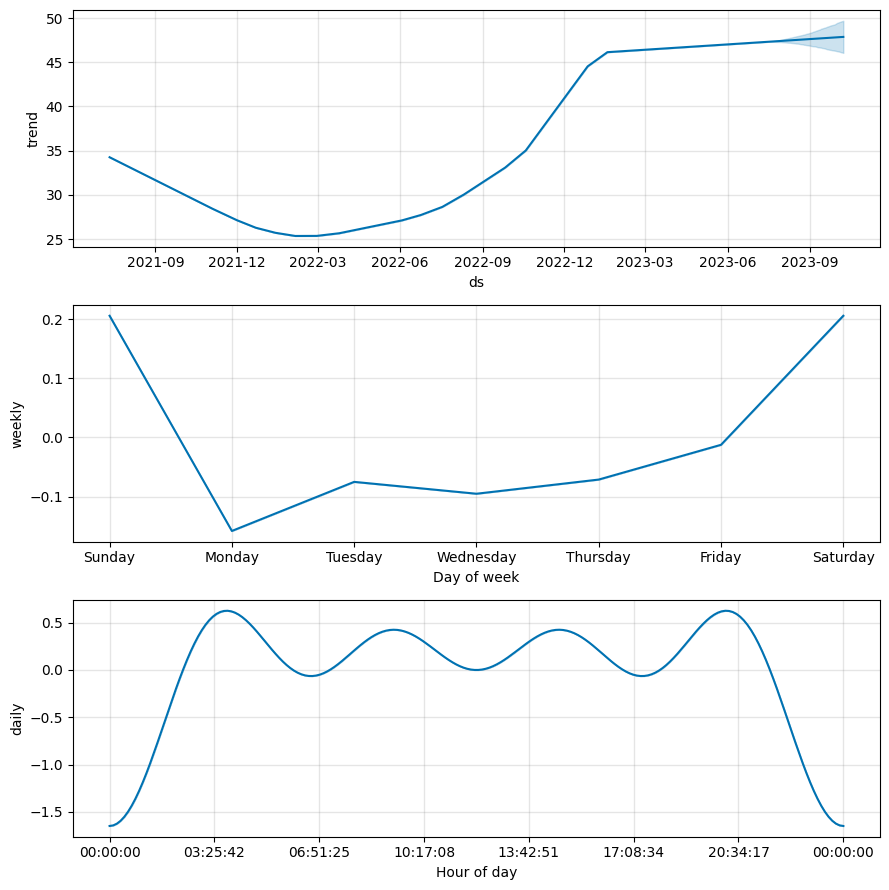

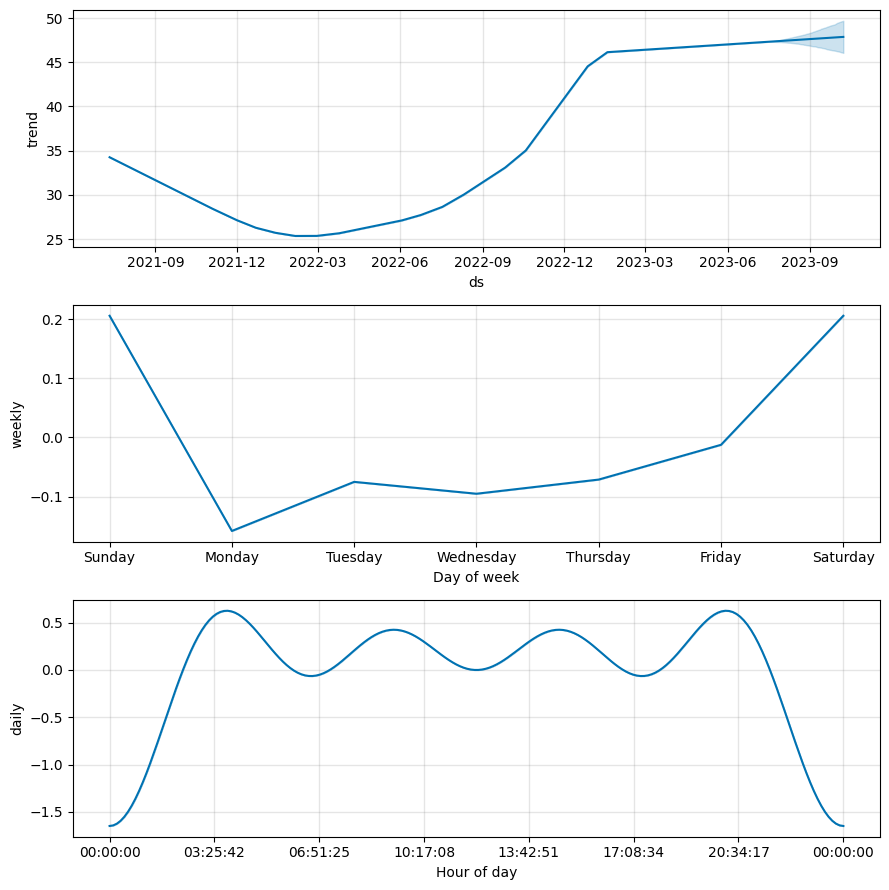

In [26]:
prophet.plot_components(predictions)

In [27]:
future_dates.tail()

,ds
580,2023-10-04
581,2023-10-05
582,2023-10-06
583,2023-10-07
584,2023-10-08


In [28]:
prophet.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [29]:
train_sample = sample.iloc[:-90]
test_sample = sample.iloc[-90:]

train_sample.shape,test_sample.shape

((405, 2), (90, 2))

In [30]:
model = Prophet(daily_seasonality=True)
model.fit(train_sample)

future = model.make_future_dataframe(periods=365)
pred = model.predict(future)
plot_plotly(model,pred)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwidznqd_/f_rgzwqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwidznqd_/2j08eanc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54483', 'data', 'file=/tmp/tmpwidznqd_/f_rgzwqo.json', 'init=/tmp/tmpwidznqd_/2j08eanc.json', 'output', 'file=/tmp/tmpwidznqd_/prophet_model99n2tujf/prophet_model-20230710213529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:35:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:35:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


(90, 19)


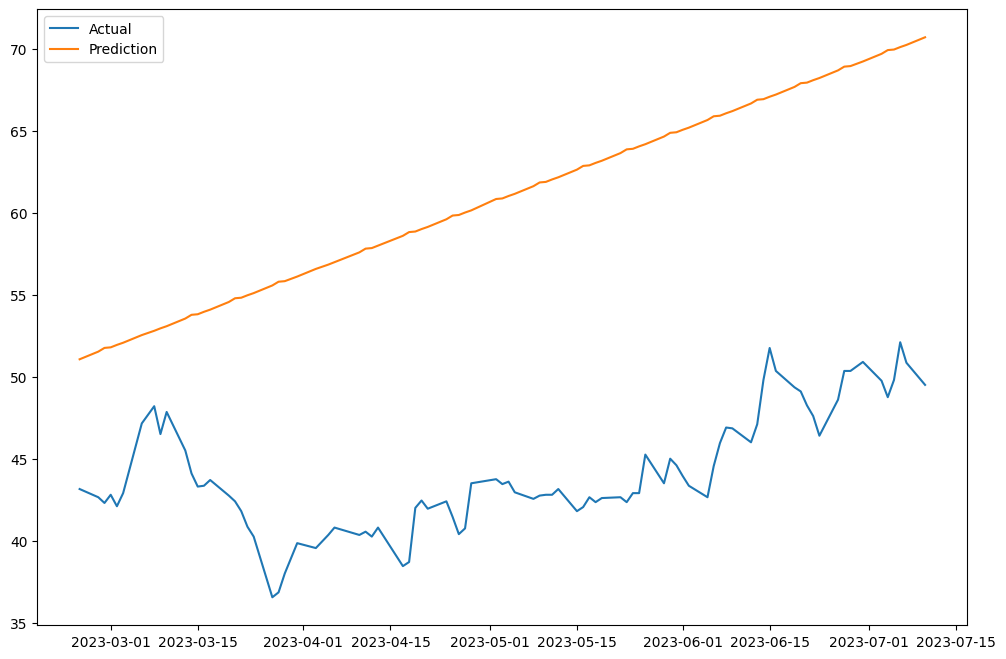

In [31]:
plt.figure(figsize=(12,8))

p = pred[pred['ds'].isin(test_sample['ds'])]
print(p.shape)
plt.plot(pd.to_datetime(test_sample['ds']), test_sample['y'], label='Actual')
plt.plot(pd.to_datetime(test_sample['ds']), p['yhat'], label='Prediction')
plt.legend()

In [32]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-12,34.342845,28.435847,36.883527,34.342845,34.342845,-1.689763,-1.689763,-1.689763,-1.609212,-1.609212,-1.609212,-0.080551,-0.080551,-0.080551,0.0,0.0,0.0,32.653082
1,2021-07-13,34.290134,28.496234,37.004071,34.290134,34.290134,-1.606333,-1.606333,-1.606333,-1.609212,-1.609212,-1.609212,0.002879,0.002879,0.002879,0.0,0.0,0.0,32.683801
2,2021-07-14,34.237424,28.138432,36.591250,34.237424,34.237424,-1.716688,-1.716688,-1.716688,-1.609212,-1.609212,-1.609212,-0.107476,-0.107476,-0.107476,0.0,0.0,0.0,32.520736
3,2021-07-15,34.184713,28.230639,36.841535,34.184713,34.184713,-1.711430,-1.711430,-1.711430,-1.609212,-1.609212,-1.609212,-0.102218,-0.102218,-0.102218,0.0,0.0,0.0,32.473283
4,2021-07-16,34.132003,28.105971,36.635576,34.132003,34.132003,-1.724149,-1.724149,-1.724149,-1.609212,-1.609212,-1.609212,-0.114938,-0.114938,-0.114938,0.0,0.0,0.0,32.407853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2024-02-19,104.663453,90.367523,114.633904,92.820828,115.372643,-1.689763,-1.689763,-1.689763,-1.609212,-1.609212,-1.609212,-0.080551,-0.080551,-0.080551,0.0,0.0,0.0,102.973690
766,2024-02-20,104.807561,90.680157,114.401614,92.903118,115.562968,-1.606333,-1.606333,-1.606333,-1.609212,-1.609212,-1.609212,0.002879,0.002879,0.002879,0.0,0.0,0.0,103.201228
767,2024-02-21,104.951669,90.357065,115.308199,93.018362,115.745240,-1.716688,-1.716688,-1.716688,-1.609212,-1.609212,-1.609212,-0.107476,-0.107476,-0.107476,0.0,0.0,0.0,103.234981
768,2024-02-22,105.095777,90.751596,114.877270,93.137921,115.924010,-1.711430,-1.711430,-1.711430,-1.609212,-1.609212,-1.609212,-0.102218,-0.102218,-0.102218,0.0,0.0,0.0,103.384347


In [33]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-12,34.257587,27.991505,36.662213,34.257587,34.257587,-1.807601,-1.807601,-1.807601,-1.64931,-1.64931,-1.64931,-0.158291,-0.158291,-0.158291,0.0,0.0,0.0,32.449986
1,2021-07-13,34.206776,28.209378,36.446600,34.206776,34.206776,-1.724466,-1.724466,-1.724466,-1.64931,-1.64931,-1.64931,-0.075156,-0.075156,-0.075156,0.0,0.0,0.0,32.482310
2,2021-07-14,34.155965,28.078338,36.452497,34.155965,34.155965,-1.744561,-1.744561,-1.744561,-1.64931,-1.64931,-1.64931,-0.095250,-0.095250,-0.095250,0.0,0.0,0.0,32.411404
3,2021-07-15,34.105154,28.134014,36.457533,34.105154,34.105154,-1.720564,-1.720564,-1.720564,-1.64931,-1.64931,-1.64931,-0.071254,-0.071254,-0.071254,0.0,0.0,0.0,32.384590
4,2021-07-16,34.054343,28.495557,36.451662,34.054343,34.054343,-1.661687,-1.661687,-1.661687,-1.64931,-1.64931,-1.64931,-0.012377,-0.012377,-0.012377,0.0,0.0,0.0,32.392656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2023-10-04,47.840800,41.449444,50.903785,46.181620,49.562114,-1.744561,-1.744561,-1.744561,-1.64931,-1.64931,-1.64931,-0.095250,-0.095250,-0.095250,0.0,0.0,0.0,46.096239
581,2023-10-05,47.847364,41.469795,50.706878,46.152253,49.581196,-1.720564,-1.720564,-1.720564,-1.64931,-1.64931,-1.64931,-0.071254,-0.071254,-0.071254,0.0,0.0,0.0,46.126800
582,2023-10-06,47.853928,41.454639,51.300657,46.118492,49.634722,-1.661687,-1.661687,-1.661687,-1.64931,-1.64931,-1.64931,-0.012377,-0.012377,-0.012377,0.0,0.0,0.0,46.192240
583,2023-10-07,47.860492,41.947841,51.271720,46.093918,49.657553,-1.443147,-1.443147,-1.443147,-1.64931,-1.64931,-1.64931,0.206164,0.206164,0.206164,0.0,0.0,0.0,46.417345


In [34]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, initial='365 days', period='100 days', horizon = '90 days')
df_cv.head()

INFO:prophet:Making 3 forecasts with cutoffs between 2022-09-23 00:00:00 and 2023-04-11 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwidznqd_/geapmen3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwidznqd_/bp32mzh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20895', 'data', 'file=/tmp/tmpwidznqd_/geapmen3.json', 'init=/tmp/tmpwidznqd_/bp32mzh7.json', 'output', 'file=/tmp/tmpwidznqd_/prophet_modelry47rj9l/prophet_model-20230710213530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:35:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:35:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwidznqd_/ne5hk3zx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwidznqd_/2byn3y85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-09-26,32.899678,30.755529,34.996351,30.549999,2022-09-23
1,2022-09-27,32.947244,30.844262,34.994569,30.200001,2022-09-23
2,2022-09-28,33.035898,30.808755,35.055945,30.100000,2022-09-23
3,2022-09-29,33.120575,30.859965,35.210583,29.700001,2022-09-23
4,2022-09-30,33.188237,31.096023,35.421276,30.400000,2022-09-23


In [35]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,48.351254,6.953507,6.437964,0.150766,0.140179,0.147794,0.0
1,10 days,39.612074,6.293812,5.823235,0.140397,0.131145,0.136540,0.0
2,11 days,37.674796,6.137980,5.689982,0.138580,0.131145,0.134701,0.0
3,12 days,38.385161,6.195576,5.781684,0.139498,0.124242,0.135868,0.0
4,13 days,39.087312,6.251985,5.866262,0.143401,0.134293,0.138462,0.0


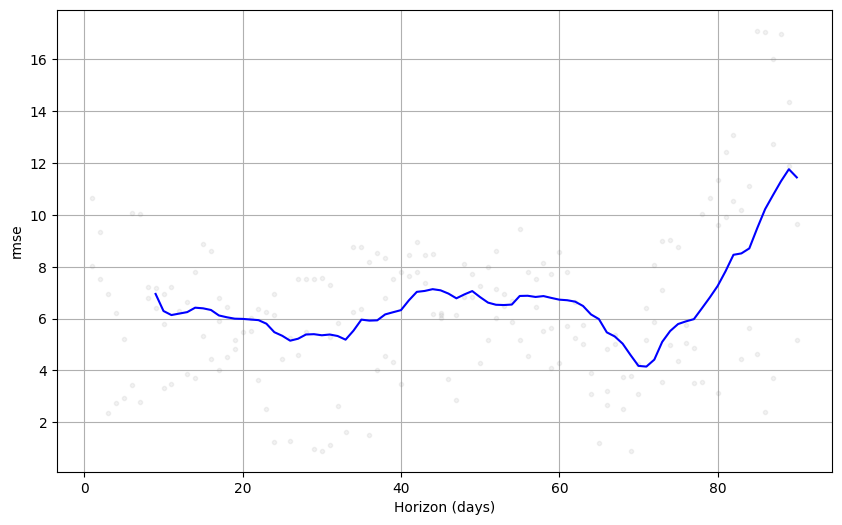

In [36]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')